In [1]:
# from methods import OA_SA, VA_SA
import numpy as np
from envs import DynamicQVRPEnv
from methods import Agent, GreedyAgent, MSAAgent, OfflineAgent
from experiments import run_agent
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from utils.plot_results import plot
import pandas as pd

In [2]:
# env_configs = {
#         "K" : 50,
#         "Q" : 100, 
#         "DoD" : 0.5,
#         "vehicle_capacity" : 25,
#         "re_optimization" : False,
#         "costs_KM" : [1, 1], 
#         "emissions_KM" : [.1, .3]
#     }

# env_configs = {
#             "K" : 50,
#             "Q" : 70, 
#             "DoD" : 0.7,
#             "vehicle_capacity" : 25,
#             "re_optimization" : True,
#             "costs_KM" : [1, 1],
#             "emissions_KM" : [.1, .3],
#             "n_scenarios" : 500
#         }

In [3]:

# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDyn_100"
file = "res_TSP_fullDyn_100"
with open(f'results/{file}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_SL.pkl', "rb") as f:
    res_SL = pickle.load(f)
    
with open(f'results/{file}/res_RL_DQN.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
# with open(f'results/{file}/res_RL_DQN_equiProb.pkl', "rb") as f:
#     res_RL_equiProb = pickle.load(f)
    
# with open(f'results/{file}/res_RL_PPO.pkl', "rb") as f:
#     res_RL_PPO = pickle.load(f)

with open(f'results/{file}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    

data = {
    "Offline" : res_offline['rs'],
    "MSA" : res_MSA['rs'],
    "Greedy" : res_greedy['rs'],
    "SL" : res_SL['rs'],
    "DQN" : res_RL['rs'],
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
}
    
    

In [4]:
df = pd.DataFrame(data)
df

,Offline,MSA,Greedy,SL,DQN,Random
0,29.0,27.0,24.0,25.0,30.0,21.0
1,29.0,23.0,24.0,30.0,30.0,22.0
2,30.0,30.0,29.0,28.0,30.0,20.0
3,28.0,30.0,30.0,26.0,30.0,21.0
4,28.0,26.0,27.0,25.0,30.0,22.0
...,...,...,...,...,...,...
95,28.0,26.0,27.0,30.0,29.0,21.0
96,30.0,30.0,30.0,30.0,30.0,25.0
97,30.0,21.0,24.0,23.0,30.0,15.0
98,26.0,29.0,29.0,23.0,30.0,20.0


<Axes: >

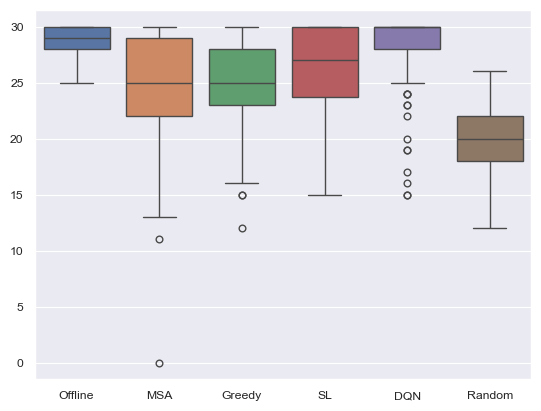

In [5]:
sns.boxplot(data=data)

In [6]:
env_configs

{'K': 50,
 'Q': 100,
 'DoD': 1.0,
 'vehicle_capacity': 30,
 're_optimization': False,
 'costs_KM': [1],
 'emissions_KM': [0.3],
 'n_scenarios': 100,
 'test': True}

In [7]:
data['Offline'].mean()

np.float64(28.87)

In [8]:
[data[k].mean() for k in data.keys()]

[np.float64(28.87),
 np.float64(24.6),
 np.float64(24.79),
 np.float64(26.19),
 np.float64(28.17),
 np.float64(19.78)]

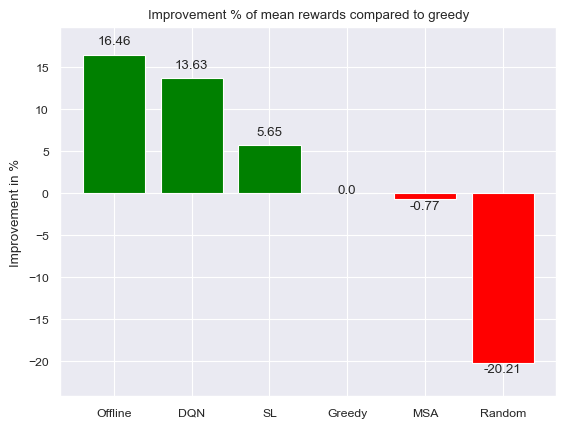

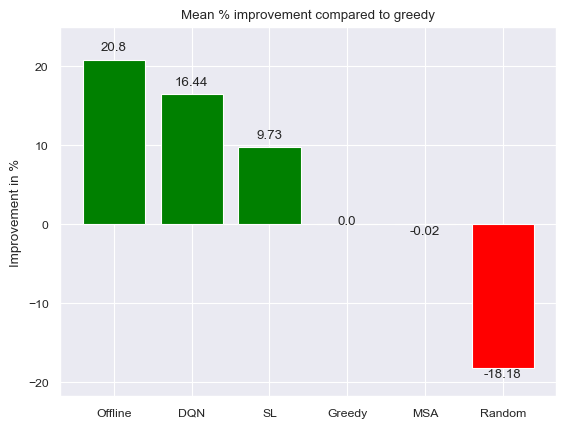

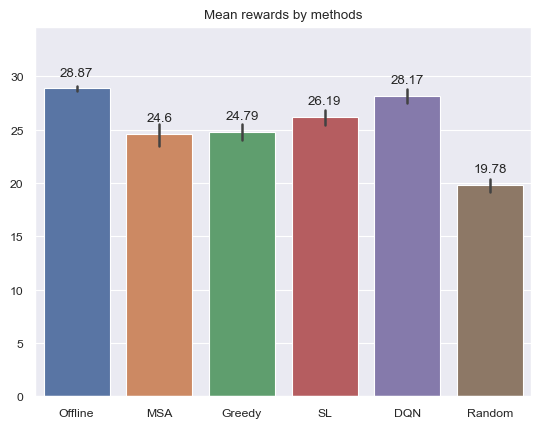

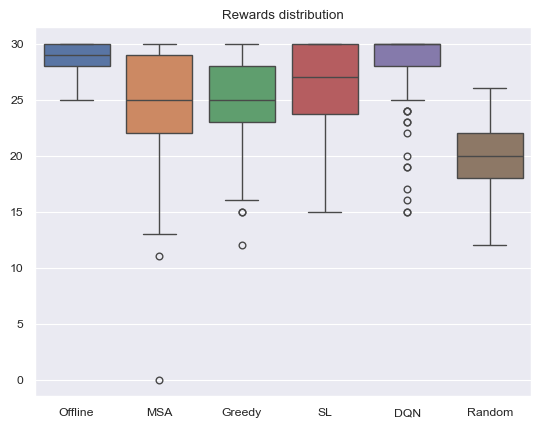

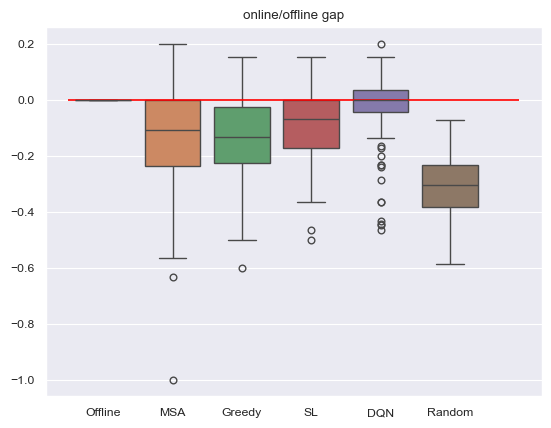

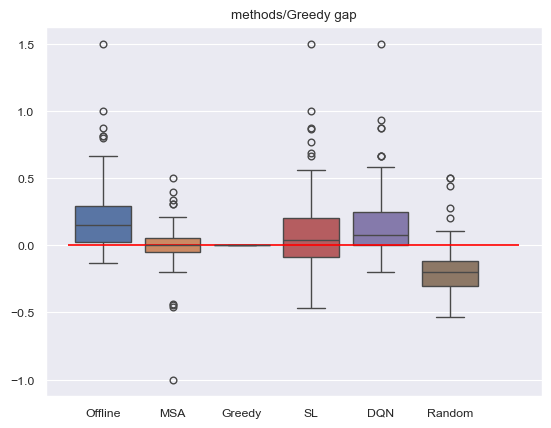

/Users/faridounet/Research/PhD/DynamicQVRP/utils/plot_results.py:74: RuntimeWarning: divide by zero encountered in divide
  k : data[k]/data[method] -1
/Users/faridounet/Research/PhD/DynamicQVRP/utils/plot_results.py:74: RuntimeWarning: invalid value encountered in divide
  k : data[k]/data[method] -1


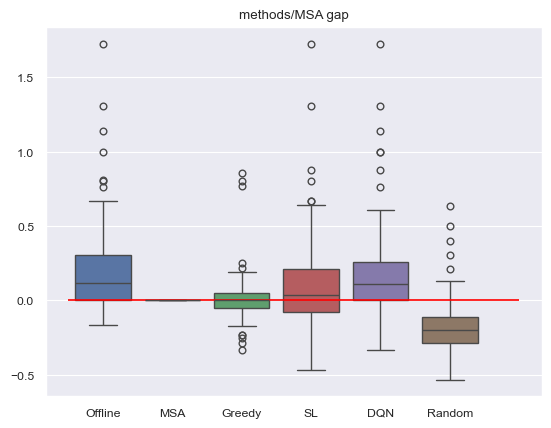

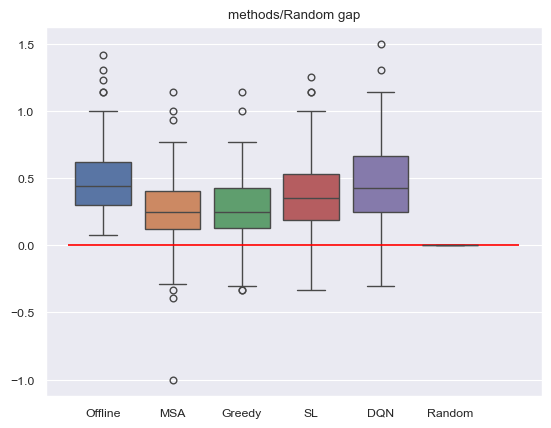

In [37]:
sns.color_palette("deep")
plot(data)

In [10]:
assert False

AssertionError: 

In [12]:
with open(f'results/res_TSP_fullDynamic/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
len(res_random["rs"])

500

In [14]:
df = pd.DataFrame(columns=["epoch", "rs"])
rs = np.load("results/dqn_rs.npy")
rs = np.concatenate(
    [res_random["rs"][None], rs],
    axis=0
)
df["rs"] = rs.flatten()
df["epoch"] = np.array([len(rs[i])*[i] for i in range(len(rs))]).flatten()
df

,epoch,rs
0,0,19.0
1,0,20.0
2,0,25.0
3,0,22.0
4,0,23.0
...,...,...
6495,12,17.0
6496,12,16.0
6497,12,30.0
6498,12,30.0


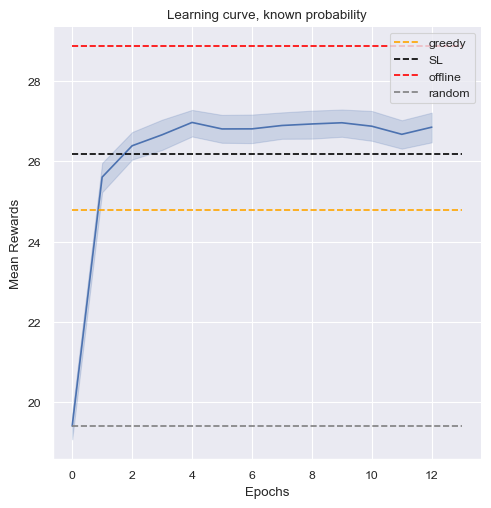

In [36]:
sns.relplot(
    data=df, kind="line",
    x="epoch", y="rs",
    # errorbar="ci",
    # markers=True, dashes=False
)
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'orange', label="greedy", linestyles='--')
plt.hlines(res_SL["rs"].mean(), 0, len(rs), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='--')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'gray', label="random", linestyles='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve, known probability')
plt.legend()
plt.show()

In [23]:
rs = np.load("results/dqn_rs.npy")
df = pd.DataFrame(rs)
df.columns = ["DQN"]
df

ValueError: Length mismatch: Expected axis has 500 elements, new values have 1 elements

In [21]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


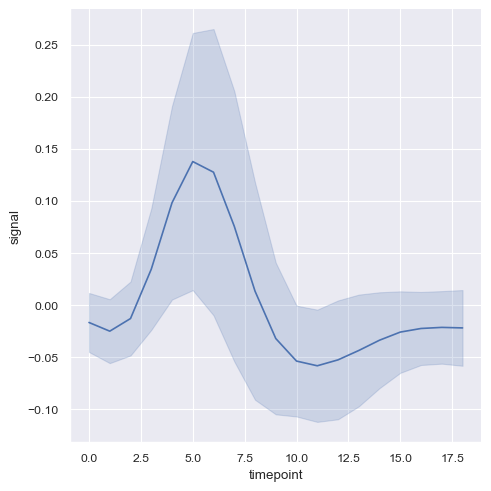

In [31]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    errorbar="sd",
)

Different DoDs

In [ ]:
# GreedySL = []
# GreedyRL = []
# x = [1., .95, .9, .85, .8, .75]

# for dod in x:
#     with open(f'results/DoD{dod}/res_SL.pkl', "rb") as f: res_SL = pickle.load(f)
#     with open(f'results/DoD{dod}/res_RL.pkl', "rb") as f: res_RL = pickle.load(f)
#     with open(f'results/DoD{dod}/res_greedy.pkl', "rb") as f: res_greedy = pickle.load(f)
    
#     GreedySL.append(100*(res_SL["rs"].mean()/res_greedy["rs"].mean() -1))
#     GreedyRL.append(100*(res_RL["rs"].mean()/res_greedy["rs"].mean() -1))
    
# print(GreedySL)
# print(GreedyRL)

In [ ]:
# # plt.plot(x, GreedySL)
# plt.plot(x, GreedyRL)
# # plt.axis([max(x), min(x), min(GreedySL), max(GreedySL)])

In [ ]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter
import pandas as pd

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    rolled = pd.Series(values).rolling(window)
    std = np.array(rolled.std())#/np.sqrt(window)
    mean = np.array(rolled.mean())
    # weights = np.repeat(1.0, window) / window
    return mean, std#np.convolve(values, weights, "valid"), std


def plot_results(log_folder, 
                 title="Learning Curve", 
                 label = None,
                 window = 75,
                 ylim = None,
                 n = 0,
                 ):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    if n:
        ys = []
        for i in range(n):
            x, y = ts2xy(load_results(log_folder[:-1]+str(i)), "timesteps")
            ys.append(y[:10_000])
            print(len(y))
        y = np.mean(ys, axis=0)
    else:
        x, y = ts2xy(load_results(log_folder), "timesteps")
    y, std = moving_average(y, window=window)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    if label is None:
        label = 'mean rewards $\pm 2\sigma$'
    plt.plot(x, y, label=label)
    plt.fill_between(x, y - 2*std, y + 2*std, alpha=0.2)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    if ylim is not None:
        plt.ylim(ylim)
    plt.title(title + " Smoothed")
    # plt.legend()
    # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return x
    # plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_14640/2819397349.py:48: SyntaxWarning: invalid escape sequence '\p'
  label = 'mean rewards $\pm 2\sigma$'


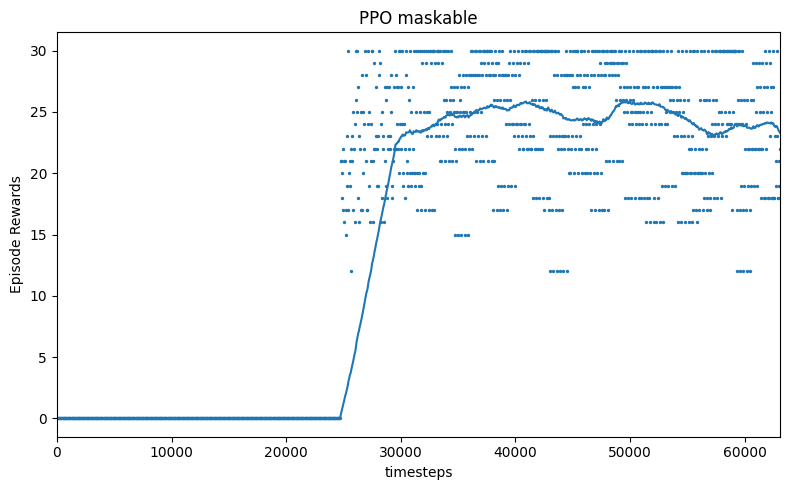

In [ ]:
log_dirPPO = f'methods/ML/models/PPO/'
log_dirDQN = f'methods/ML/models/DQN/'

# log_dir = f'ppo_mask/rewardMode(normalized_terminal)_obsMode(routes)_steps(350000)/'
# log_dir = f'./'
# Helper from the library
results_plotter.plot_results(
    [log_dirPPO], 5e5, results_plotter.X_TIMESTEPS, "PPO maskable", (8, 5)
)

In [13]:
x = plot_results(log_dirDQN, window=500, label='mean RL (DQN)')
_ = plot_results(log_dirPPO, window=500, label='mean RL (PPO)')
plt.hlines(res_greedy["rs"].mean(), 0, x[-1], linestyles = '-.', label=f'mean Greedy', colors='red')
plt.title(f'RL (PPO)\n Learning curve')

plt.legend(loc='lower right')
plt.show()
# plt.ylim(0,1)
# plt.fill_between(x, rs_DP.min(), rs_DP.max(), alpha=0.2)
# _ = plot_results(log_dir2)

NameError: name 'plot_results' is not defined